## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature/Attribute: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [1]:
import pandas as pd


df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


Status
0    160
1     40
Name: count, dtype: int64


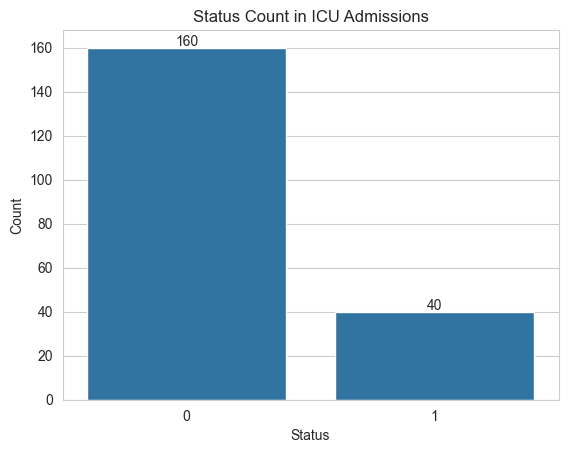

In [2]:
# Example 1:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df,x=df['Status'])
# Create a table representation of our data
status_counts = df['Status'].value_counts()
print(status_counts)
for i, value in enumerate(status_counts.values):
    plt.text(i,value+1,f'{value}',ha='center')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Count in ICU Admissions')
plt.show()

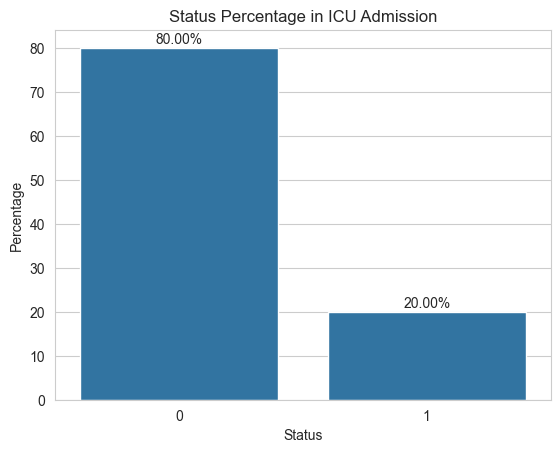

In [3]:
# how to create a percentage based plot 
status_counts = df['Status'].value_counts(normalize=True) * 100


sns.barplot(x=status_counts.index,y=status_counts.values)

for i, value in enumerate(status_counts.values):
    plt.text(i,value+1,f'{value:.2f}%',ha='center')
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Status Percentage in ICU Admission')
plt.show()

#### What to write about a bar plot
- What the plot is about? (what features/attributes)
- Percentage/Count for each group
- Whether there is a clear difference on the percentage/count 9 (subjective)

#### The figure is about the number of people admitted to the ICU that survive.
- Status '0' mean that the patient has survived the ICU
- Status '1' means that the patient has died in the ICU
- Among the 200 patients in this data there are 40 of them (20%) that died in the ICU
- We can see that there are more patients that survive than die.

### One Continuous Histogram/density plot /boxplot

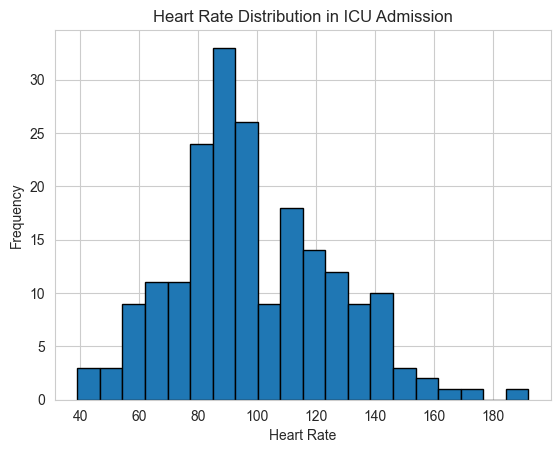

In [4]:
# Example 2: 
plt.hist(df['HeartRate'], bins=20,edgecolor='black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admission',ha='center')
plt.show()

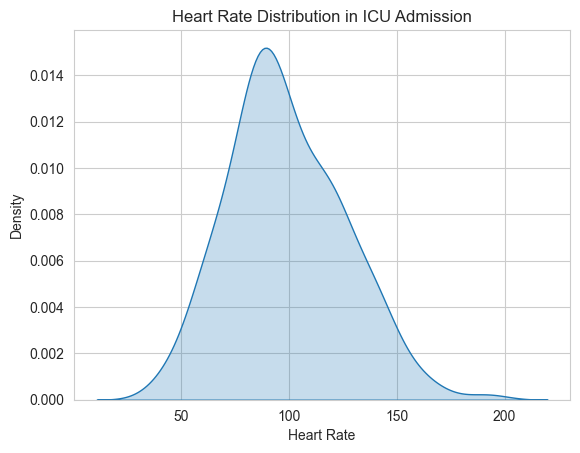

In [5]:
# Density Plot bw_adjust corrects the smoothness of bands
sns.kdeplot(df['HeartRate'],bw_adjust=1,fill=True)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admission',ha='center')
plt.show()

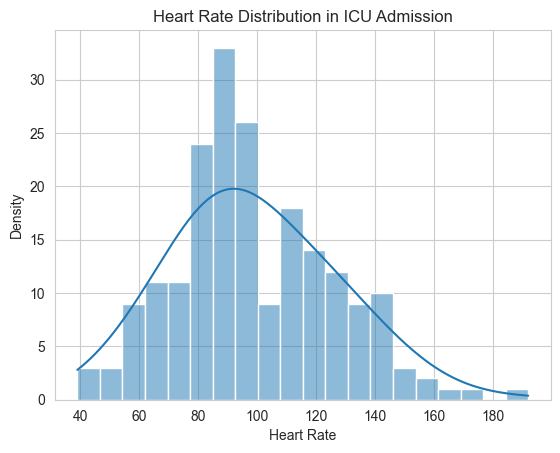

In [6]:
sns.histplot(df['HeartRate'],bins=20,kde=True,kde_kws={'bw_method':0.6})
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admission',ha='center')
plt.show()

### Description
- This distribution could be viewed as a positively skewed as the tail seems to be towards the right side of the distribution and has a higher outlier at around 183-184 heart rate 

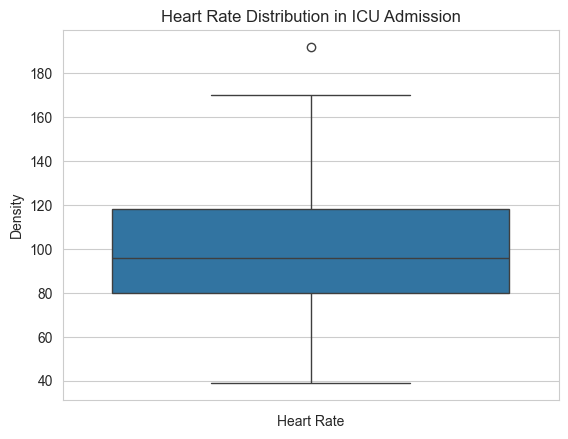

In [7]:
sns.boxplot(data=df,y='HeartRate')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admission',ha='center')
plt.show()

In [8]:
df['HeartRate'].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

<Axes: >

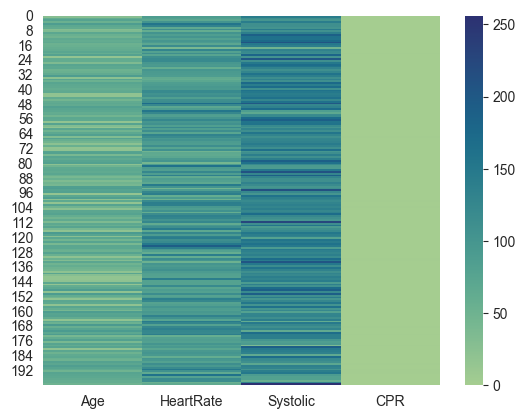

In [9]:
# Example 3: 
h_df = df[['Age','HeartRate','Systolic','CPR']]
sns.heatmap(data=h_df,cmap='crest')

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

##### What to write about a bar plot

- 
- 
- 


#### One continous: histogram/density plot/boxplot

##### Difference between histogram/density plot/ boxplot

- Histogram and density plot emphasizes the distribution of the data
- Boxplot emphasizes the statistics of the data (eg: the IQR)
- Boxplot cannot catch the distribution information, like the bi-modal. It will assume all the data follows a normal distribution
- Histogram and density plot need to choose the parameters (bins number and bandwidth)

##### Difference between histogram and bar plot

- Histogram is for the continous data and bar plot is for the categorical data 
- Histogram is always vertical but bar plot can be horizontal
- Histogram usually does not hvae spaecs between the bars but the bar plots can 
- Histogram's bar cannot change the order but bar plot's can


##### What to write about a histogram/density plot

- What the figure is about?
- Shape (skewness, mode)
- Majority of the data (Typical value: mean $\pm$ sd)
- Potential outliers

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

### Histogram/Box Plot Description
The figure is the distribution of heart rate in ICU admissions data. In the figure, the heart rate has a uni-mode distribution which is slightly skewed to the right. The typical value is within the range 98.9 $\pm$ 26.8 = [72.1,124.7]. There might exist an outlier with a large value.

##### What to write about a box plot

- What the figure is about?
- Can still comment on the skewness but not the shape
- Majority of the data (IQR)
- Potential Outlier

The figure is boxplot for the heart rate distribution in ICU Admissions Data. In the figure, the heart rate has a distribution that slightly skewed to the right. The IQR is from 80 to 118.25. It seems that there is an outlier with a larger value. 

#### Two continous: scatter plot

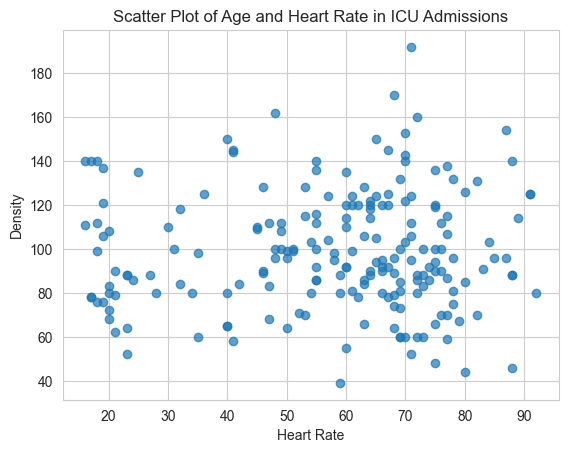

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['HeartRate'],alpha=.7)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Scatter Plot of Age and Heart Rate in ICU Admissions',ha='center')
plt.show()

##### What to write about a scatter plot
- What the figure is about?
- Trend (linear or non-linear)
- Outliers (if any)
- Clusters (if any)
Ex: The figure is a scatterplot between Age and Heart Rate in ICU data. There is no clear trend in the relationship between age and the heart rate. There is also no point that is far away from the others and no pattern for clustering.

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

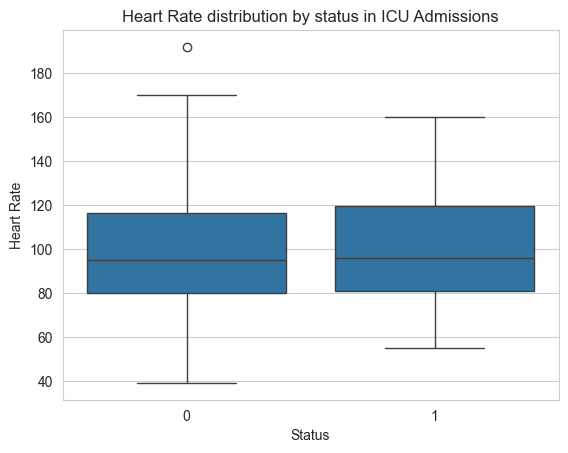

In [12]:
sns.boxplot(x='Status',y='HeartRate',data=df)
plt.xlabel('Status')
plt.ylabel('Heart Rate')
plt.title('Heart Rate distribution by status in ICU Admissions')
plt.show()

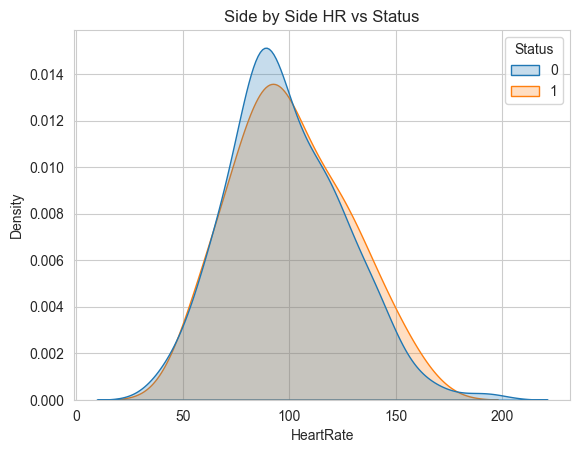

In [13]:
sns.kdeplot(data=df,x='HeartRate',hue='Status',fill=True,common_norm=False)
plt.ylabel('Density')
plt.title('Side by Side HR vs Status')
plt.show()

##### What to write about a side-by-side boxplot or density plot

- What the figure is about
- Highlight the comparison
- For the boxplot you need to declare whether the boxes are overlapped or not.
EX: The figure is a side-by-side box plot for Heart Rate vs Status. The boxes are overlapped with each other, there is no statistically significant difference between the heart rate across survival group and non-survival (no overlap in graph indicates that they are not statistically significantly different)


#### Two categorical: side-by-side bar plot

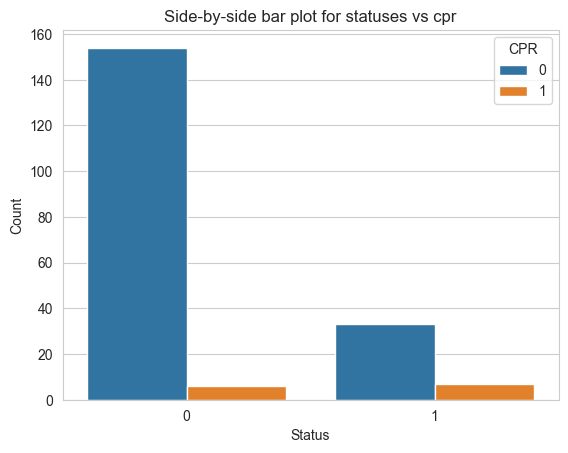

In [14]:
df['CPR'] = df['CPR'].astype('str')
sns.countplot(x='Status', hue='CPR',data=df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Side-by-side bar plot for statuses vs cpr')
plt.show()

In [15]:
# Creates count table
#proportion_table = pd.crosstab(df['Status'],df['CPR'],normalize="all")
proportion_table = pd.crosstab(df['Status'],df['CPR'],normalize="index")
proportion_table

CPR,0,1
Status,,
0,0.9625,0.0375
1,0.8250,0.1750


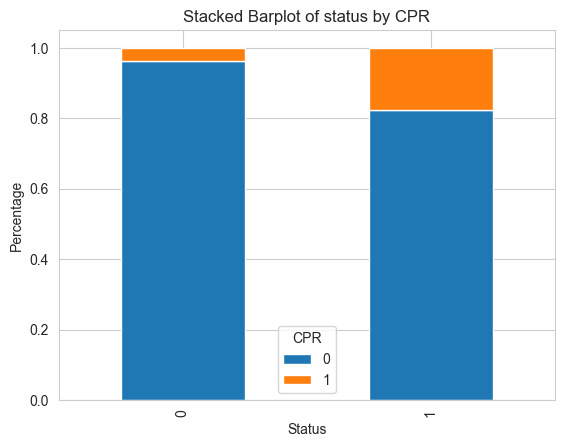

In [16]:
proportion_table.plot(kind='bar',stacked=True)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Stacked Barplot of status by CPR')
plt.show()

##### What to write about a side-by-side bar plot

- What the figure is about
- Highlight the comapriseon
- Report the rare count/percentage
Ex: The figure is a stacked bar plot for the distribution of CPR among the different status groups. For the people who died in the ICU, 17.5% of them use CPR while for the peopple who survived in the ICu 3.75% use CPR. There is clearly difference on

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [17]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [1]:

df_class_alive = titanic_data['class'].value_counts().reset_index()
df_class_alive.columns = ['class','alive']
print(df_class_alive)
sns.barplot(df_class_alive,x='class',y='alive',hue='class',palette="tab10")
plt.title('Passenger Class and Survival')
plt.xlabel('Class')
plt.ylabel('Survival')


NameError: name 'titanic_data' is not defined

Text(0, 0.5, 'Fare Price')

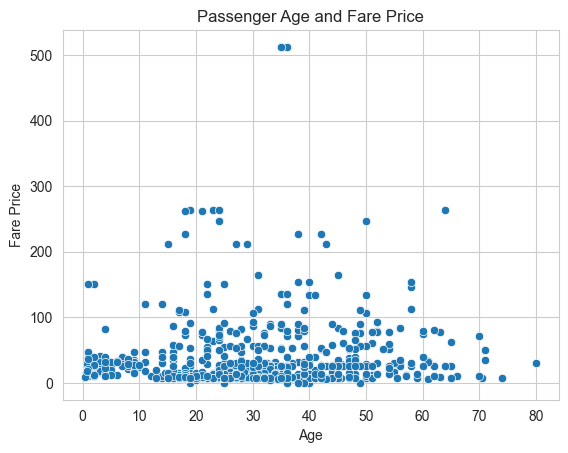

In [19]:
# Scatter Plot of Price and Age 
sns.scatterplot(data=titanic_data,x='age',y='fare')
plt.title('Passenger Age and Fare Price')
plt.xlabel('Age')
plt.ylabel('Fare Price')


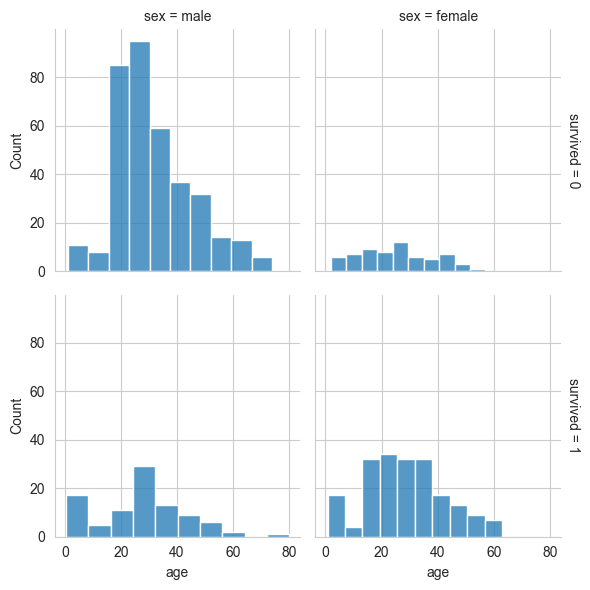

In [27]:

g = sns.FacetGrid(titanic_data, col="sex", row="survived", margin_titles=True)
g.map(sns.histplot, "age", kde=False, bins=10)

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?